In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, roc_curve, f1_score

In [2]:
arff_train = arff.loadarff('wave_2_classes_with_irrelevant_attributes.train.arff')
train = pd.DataFrame(arff_train[0])

arff_test = arff.loadarff('wave_2_classes_with_irrelevant_attributes.test.arff')
test = pd.DataFrame(arff_test[0])

In [3]:
train['classe'] = train['classe'].replace([train['classe'].unique()[0], train['classe'].unique()[1]],[0,1])
test['classe'] = test['classe'].replace([test['classe'].unique()[0], test['classe'].unique()[1]],[0,1])

In [4]:
train

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,alea92,alea93,alea94,alea95,alea96,alea97,alea98,alea99,alea100,classe
0,-0.38,-0.72,1.30,3.04,2.10,3.63,4.59,3.55,0.76,4.58,...,0.79,0.20,0.22,0.21,0.42,0.76,0.95,0.86,0.07,0
1,-0.33,0.04,0.83,0.70,3.26,1.73,3.48,3.52,1.45,1.91,...,0.20,0.86,0.83,0.95,0.48,0.96,0.20,0.73,0.71,0
2,0.48,0.94,2.49,2.82,2.93,5.55,3.48,5.65,5.01,3.90,...,0.42,0.77,0.94,0.51,0.15,0.89,0.62,0.31,0.21,0
3,0.57,1.15,1.71,2.45,0.60,2.32,2.29,1.74,1.84,3.16,...,0.00,0.51,0.29,0.38,0.07,0.83,0.18,0.82,0.76,0
4,-1.99,-1.87,1.03,2.07,3.42,3.71,6.98,3.87,1.16,2.85,...,0.02,0.48,0.15,0.05,0.26,0.72,0.03,0.18,0.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.18,0.96,1.72,3.58,2.10,2.40,3.24,3.68,5.33,4.92,...,0.11,0.52,0.98,0.65,0.82,0.83,0.69,0.47,0.25,1
9996,-0.07,1.59,0.87,-0.42,0.58,1.26,5.07,4.65,4.10,3.64,...,0.77,0.29,0.64,0.34,0.86,0.72,0.88,0.48,0.54,1
9997,2.04,-0.79,2.46,1.08,2.84,4.37,6.50,5.47,3.67,2.29,...,0.28,0.82,0.13,0.75,0.71,0.82,0.63,0.76,0.88,1
9998,0.59,1.54,0.81,1.09,2.37,4.87,5.27,4.81,6.03,4.29,...,0.55,0.24,0.53,0.84,0.32,0.05,0.03,0.42,0.32,1


In [5]:
test

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,alea92,alea93,alea94,alea95,alea96,alea97,alea98,alea99,alea100,classe
0,-1.14,1.21,0.42,0.83,1.08,1.42,-0.09,0.91,0.02,2.32,...,0.63,0.15,0.68,0.23,0.28,0.19,0.17,0.33,0.43,0
1,0.82,0.75,-0.44,1.27,-0.69,0.93,2.69,-0.82,-2.23,-0.15,...,0.07,0.72,0.26,0.56,0.93,0.09,0.84,0.38,0.49,0
2,0.08,0.96,-0.65,2.08,2.89,1.28,2.97,2.78,0.86,0.37,...,0.19,0.83,0.23,0.48,0.72,0.01,0.76,0.00,0.37,0
3,-0.20,3.04,2.76,3.08,4.06,1.46,4.32,3.94,2.38,2.71,...,0.63,0.80,0.31,0.42,0.18,0.07,0.68,0.43,0.37,0
4,-1.45,-0.22,1.05,-0.21,0.23,-1.56,1.22,-0.01,-0.15,1.64,...,0.88,0.24,0.77,0.27,0.85,0.08,0.07,0.17,0.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23329,-0.47,0.84,1.34,3.26,4.20,5.19,3.83,5.37,4.05,2.13,...,0.83,0.78,0.29,0.95,0.34,0.51,0.89,0.79,0.96,1
23330,1.29,0.19,0.84,-0.43,-0.26,1.25,2.13,4.64,3.23,5.28,...,0.75,0.91,0.45,0.77,0.92,0.58,0.25,0.96,0.56,1
23331,0.64,-0.31,0.64,1.00,0.09,1.93,3.16,3.17,3.52,3.45,...,0.28,0.22,0.72,0.22,0.70,0.69,0.02,0.63,0.05,1
23332,-0.01,-0.16,-0.88,-0.10,0.79,1.35,2.03,1.44,3.79,4.40,...,0.90,0.76,0.68,0.80,0.93,0.90,0.28,0.23,0.16,1


In [6]:
X_train = train.drop(columns = ['classe'])
y_train = train['classe']

X_test = test.drop(columns = ['classe'])
y_test = test['classe']

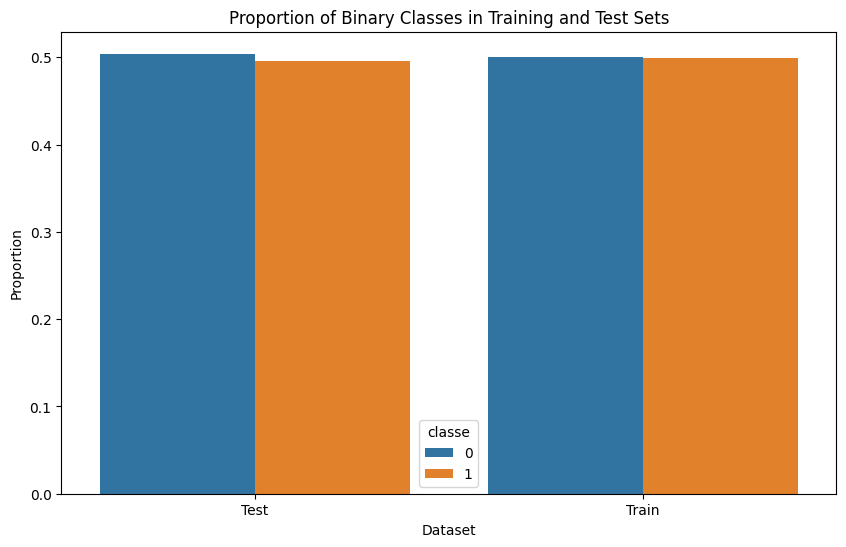

In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Combine the datasets
# train['Dataset'] = 'Train'
# test['Dataset'] = 'Test'

# # Combine the datasets
# combined_df = pd.concat([train, test])

# # Calculate proportions for each class in each dataset
# proportions_df = combined_df.groupby(['Dataset', 'classe']).size().reset_index(name='Count')

# # Calculate the total number of samples in each dataset
# total_counts = combined_df['Dataset'].value_counts().reset_index()
# total_counts.columns = ['Dataset', 'Total']

# # Merge to get the total counts into proportions_df
# proportions_df = proportions_df.merge(total_counts, on='Dataset')

# # Calculate the proportion
# proportions_df['Proportion'] = proportions_df['Count'] / proportions_df['Total']


# # Plot using seaborn
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Dataset', y='Proportion', hue='classe', data=proportions_df)
# plt.title('Proportion of Binary Classes in Training and Test Sets')
# plt.ylabel('Proportion')
# plt.xlabel('Dataset')
# plt.show()


# Linear Regression

#### Forward stepwise

In [40]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr,
                                n_features_to_select= 20,
                                direction = 'forward',
                                scoring='r2',
                                cv=5)

sfs = sfs.fit(X_train, y_train)


selected_features =sfs.get_feature_names_out()
print(f'Selected features: {selected_features}')


X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)
lr.fit(X_train_selected, y_train)

y_pred = lr.predict(X_test_selected)

Selected features: ['v4' 'v6' 'v8' 'v9' 'v10' 'v11' 'v12' 'v13' 'v15' 'v16' 'v17' 'v18' 'v21'
 'alea1' 'alea7' 'alea14' 'alea70' 'alea73' 'alea80' 'alea85']


In [44]:
y_pred_bin = []
threshold_p = 0.5
for iloc, i in enumerate(y_pred):
    if i >= threshold_p:
        y_pred_bin.append(1)
    else:
        y_pred_bin.append(0)
acc = accuracy_score(y_test, y_pred_bin)
f1 = f1_score(y_test, y_pred_bin)
print(f'Accuracy: {acc}')
print(f'F1 score: {f1}')

Accuracy: 0.9190023142195938
F1 score: 0.919908466819222


#### Lasso

In [46]:
# Use LassoCV to find the best alpha
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f'Best alpha: {best_alpha}')

# Train the Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = lasso_best.predict(X_test)



Best alpha: 0.0024757917332880134


In [47]:
y_pred_bin = []
threshold_p = 0.5
for iloc, i in enumerate(y_pred):
    if i >= threshold_p:
        y_pred_bin.append(1)
    else:
        y_pred_bin.append(0)
acc = accuracy_score(y_test, y_pred_bin)
f1 = f1_score(y_test, y_pred_bin)
print(f'Accuracy: {acc}')
print(f'F1 score: {f1}')

Accuracy: 0.9223450758549756
F1 score: 0.9231943031536114


In [48]:
coefficients = lasso_best.coef_
print(f'Coefficients: {coefficients}')

selected_features = np.where(coefficients != 0)[0]
print(f'Selected features: {selected_features}')

Coefficients: [ 0.         -0.         -0.00407755 -0.019093   -0.02221424 -0.00362407
  0.          0.02221435  0.04218051  0.04751999  0.0662758   0.03872478
  0.01480306 -0.00466215 -0.02392512 -0.03556203 -0.04361003 -0.03337441
 -0.01852327 -0.00798716  0.0039877   0.         -0.          0.
 -0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.          0.         -0.

# Logistic Regression

#### lasso

In [7]:
# Initialize the logistic regression model with L1 penalty
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

# Define the hyperparameter grid (C values for regularization strength)
param_grid = {'C': np.logspace(-4, 4, 20)}

# Use GridSearchCV to find the best hyperparameter
grid_search = GridSearchCV(log_reg_l1, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter (C) and the corresponding score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_
print(f'Best C: {best_C}')
print(f'Best cross-validation accuracy: {best_score}')

# Train the logistic regression model with the best C
log_reg_l1_best = LogisticRegression(penalty='l1', solver='saga', C=best_C, max_iter=10000)
log_reg_l1_best.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_l1_best.predict(X_test)

Best C: 0.012742749857031334
Best cross-validation accuracy: 0.9189999999999999


In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9236736093254478
F1 score: 0.9241320553780618
Confusion Matrix:
[[10706  1054]
 [  727 10847]]


In [12]:
coefficients = log_reg_l1_best.coef_
print(f'Coefficients: {coefficients}')

selected_features = np.where(coefficients != 0)[0]
print(f'Selected features: {selected_features}')

Coefficients: [[ 0.          0.          0.         -0.1610363  -0.1799845   0.
   0.          0.24877152  0.47625845  0.53328549  0.74095204  0.42689783
   0.08099083 -0.02669093 -0.29672684 -0.3928026  -0.49827554 -0.3493908
  -0.18771565 -0.03964553  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.      

# Random Forest 

In [8]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100,150,200, 300,500],
    'max_depth': [None,5, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 7,10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10],
    'bootstrap': [True, False],
    'max_leaf_nodes': [None, 1, 3, 5,10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score}')


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy}')
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1}')

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9000 fits failed out of a total of 45000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\lib\site-package

Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 200}
Best cross-validation score: 0.9146000000000001
Test accuracy: 0.9149738578897746
F1 score: 0.9171884130561817


In [20]:
# Get feature importances
feature_importances = best_model.feature_importances_

# # Assuming your feature names are 'feature_1', 'feature_2', ..., 'feature_n'
feature_names = [f'{i}' for i in X_train.columns]

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order and select the top 20
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

print(top_20_features)

   Feature  Importance
10     v11    0.136867
16     v17    0.100616
9      v10    0.093141
8       v9    0.084035
15     v16    0.082053
14     v15    0.058759
17     v18    0.049890
11     v12    0.040993
7       v8    0.034609
18     v19    0.020886
13     v14    0.016772
6       v7    0.015056
12     v13    0.012063
4       v5    0.011388
5       v6    0.009130
3       v4    0.008706
19     v20    0.006550
2       v3    0.004676
1       v2    0.002642
49  alea29    0.002404


In [19]:
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
-1 -21

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea